# **Introduction to neural network classification with TensorFlow**

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## **Creating data to view and fit**

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... Let's visualize it!

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


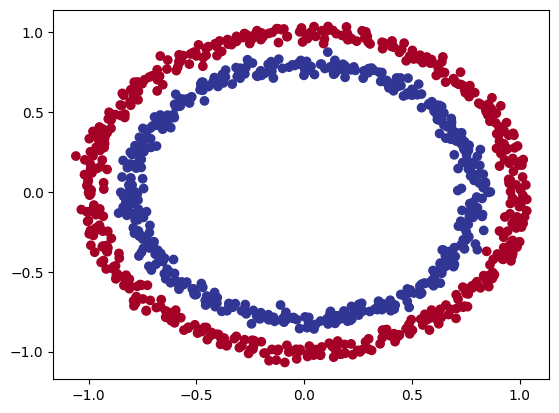

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

## **Input and output shapes**

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## **Steps in modelling**

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [ ]:
# Import TensorFlow
import tensorflow as tf

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 9ms/step - loss: 1.6904 - accuracy: 0.4630
Epoch 2/5
32/32 [==============================] - 1s 18ms/step - loss: 0.7198 - accuracy: 0.4950
Epoch 3/5
32/32 [==============================] - 0s 11ms/step - loss: 0.7024 - accuracy: 0.4870
Epoch 4/5
32/32 [==============================] - 0s 7ms/step - loss: 0.6966 - accuracy: 0.4900
Epoch 5/5
32/32 [==============================] - 0s 7ms/step - loss: 0.6949 - accuracy: 0.4970


In [ ]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 1s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932491064071655, 0.5]

## **Improving our model**

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of the hidden neurons within a layer.
2. Compile a model - here we might want to choose a different optimization function (such as Adam instead of SGD).
3. Fitting a model - Perhaps we might fit our model for more epochs.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y ,epochs=100, verbose=0)

In [ ]:
# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.5100


[0.6969078779220581, 0.5099999904632568]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y).
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls).

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max());

313/313 [==============================] - 1s 1ms/step
Doing binary classification


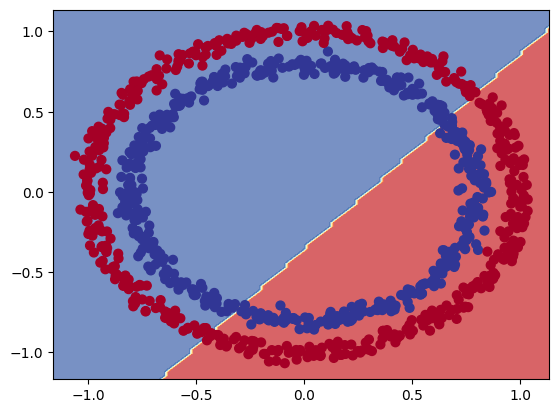

In [ ]:
# Check our the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

In [ ]:
# Let's see if our model can be used for a regression problem..

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Let's split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=0)

ValueError: ignored

Oh wait... we compiled our model for a binary classification problem.
But... we're now working on a regression problem, let's change the model to suit our data.

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 393.6180 - mae: 393.6180
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 272.7501 - mae: 272.7501
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 155.7162 - mae: 155.7162
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 52.8577 - mae: 52.8577
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 78.4436 - mae: 78.4436
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 80.6071 - mae: 80.6071
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 50.0825 - mae: 50.0825
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 51.4725 - mae: 51.4725
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 46.7612 - mae: 46.7612
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 45.2626 - mae: 45.2626
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 8ms/step


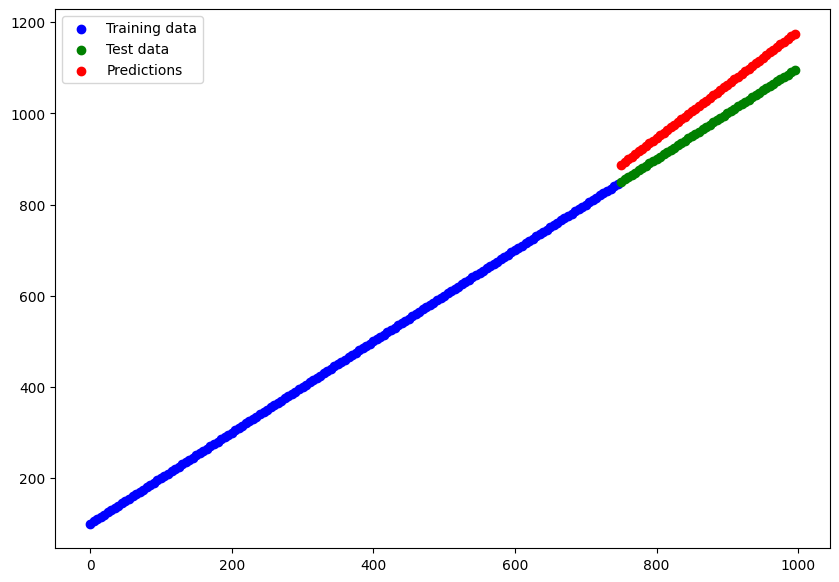

In [ ]:
# Make prediction with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## **The missing piece: Non-linearity**

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.9653 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9560 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9275 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8989 - accuracy: 0.4810
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8876 - accuracy: 0.4810
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8521 - accuracy: 0.4810
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7809 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7635 - accuracy: 0.4790
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7543 - accuracy: 0.4790
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7410 - accuracy: 0.4800
Epoch 11/

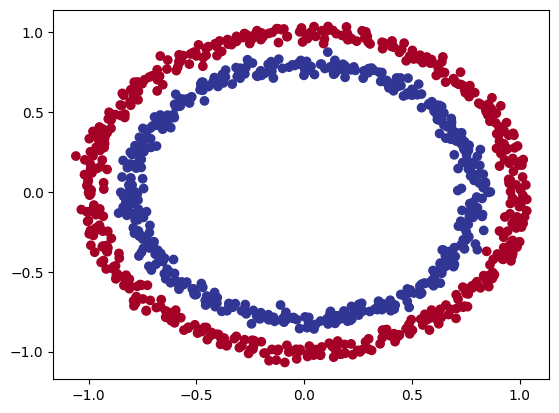

In [ ]:
# Check our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
Doing binary classification


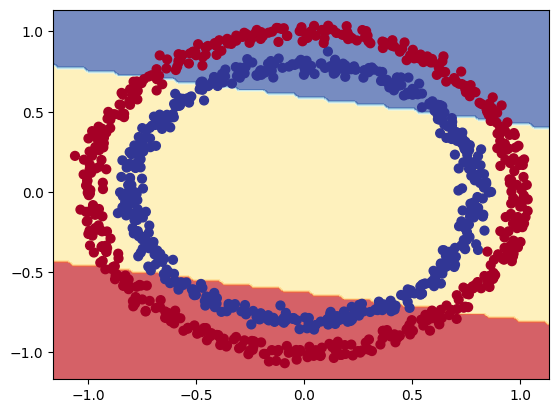

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4, X=X, y=y)

Let'S try build our first neural network with non-linear activation function.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation function
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="ReLU")
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.4917 - accuracy: 0.4720
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4436 - accuracy: 0.4730
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4290 - accuracy: 0.4730
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4188 - accuracy: 0.4720
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4105 - accuracy: 0.4720
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4028 - accuracy: 0.4730
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3957 - accuracy: 0.4720
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3898 - accuracy: 0.4740
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3744 - accuracy: 0.4720
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3351 - accuracy: 0.4730
Epoch 11/

In [ ]:
# Time to replicate the multi-layer neural network from TensorFlow

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.6841 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 3.0855 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 2.5031 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 1.8625 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 1.2400 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1557 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0979 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0460 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 1.0023 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9630 - accuracy: 0.5000
Epoch 11/

In [ ]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5900


[0.6780803799629211, 0.5899999737739563]

313/313 [==============================] - 1s 1ms/step
Doing binary classification


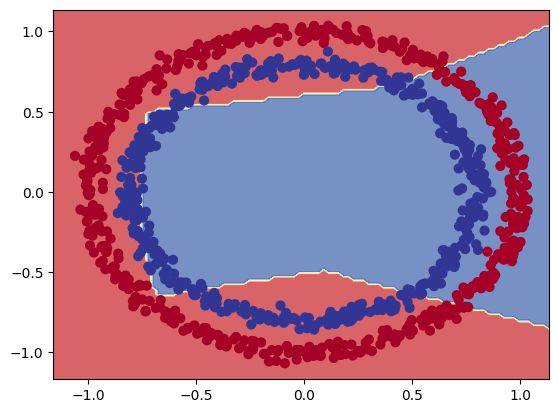

In [ ]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 5ms/step - loss: 0.7062 - accuracy: 0.4990
Epoch 2/200
32/32 [==============================] - 0s 5ms/step - loss: 0.7008 - accuracy: 0.5040
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.5030
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5040
Epoch 5/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6912 - accuracy: 0.5070
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6892 - accuracy: 0.5090
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6872 - accuracy: 0.5190
Epoch 8/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6857 - accuracy: 0.5200
Epoch 9/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6841 - accuracy: 0.5490
Epoch 10/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6827 - accuracy: 0.5510
Epoch 11/

In [ ]:
# 4. Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.9780


[0.10234993696212769, 0.9779999852180481]

313/313 [==============================] - 0s 1ms/step
Doing binary classification


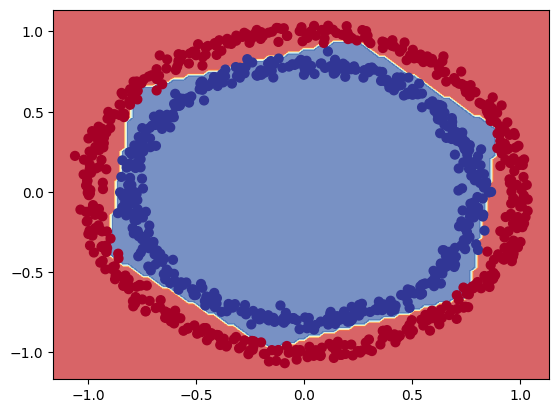

In [ ]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

**Questions:** What's wrong with the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

**Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [ ]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

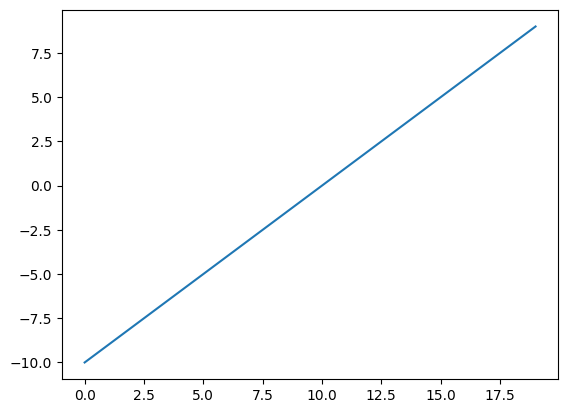

In [ ]:
# Visualize our toy tensor
plt.plot(A);

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

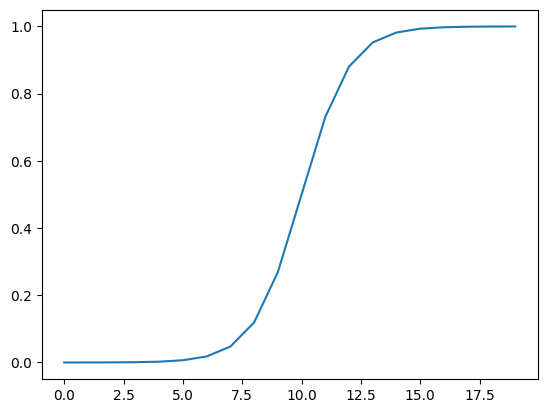

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [ ]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

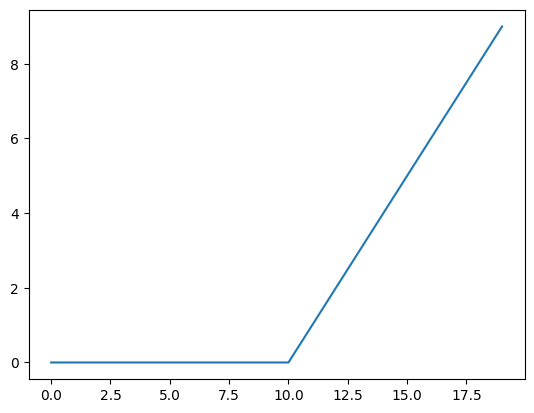

In [ ]:
# Plot Relu-modified tensor
plt.plot(relu(A));

In [ ]:
# Let's try linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

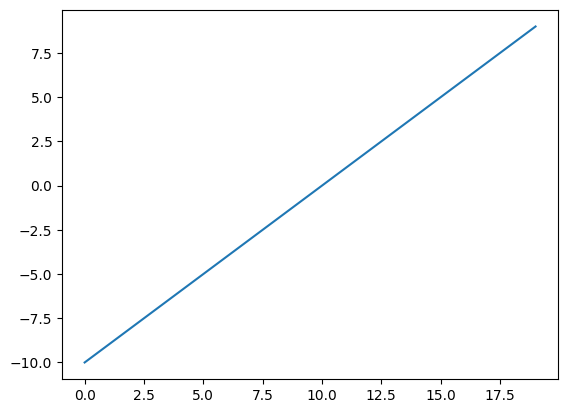

In [ ]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));

In [ ]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## **Evaluating and improving our classification**

So far, we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [ ]:
# Checkk how many examples we have
len(X)

1000

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's create a model to fit on the training data and evaluate on the testing data

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compie the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=200)

Epoch 1/200
25/25 [==============================] - 1s 3ms/step - loss: 0.6993 - accuracy: 0.4938
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6979 - accuracy: 0.4712
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.4187
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.4700
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4800
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4900
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4563
Epoch 8/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4737
Epoch 9/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 10/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5100
Epoch 11/

In [ ]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2745 - accuracy: 0.8850


[0.2744903266429901, 0.8849999904632568]

313/313 [==============================] - 0s 1ms/step
Doing binary classification
313/313 [==============================] - 1s 3ms/step
Doing binary classification


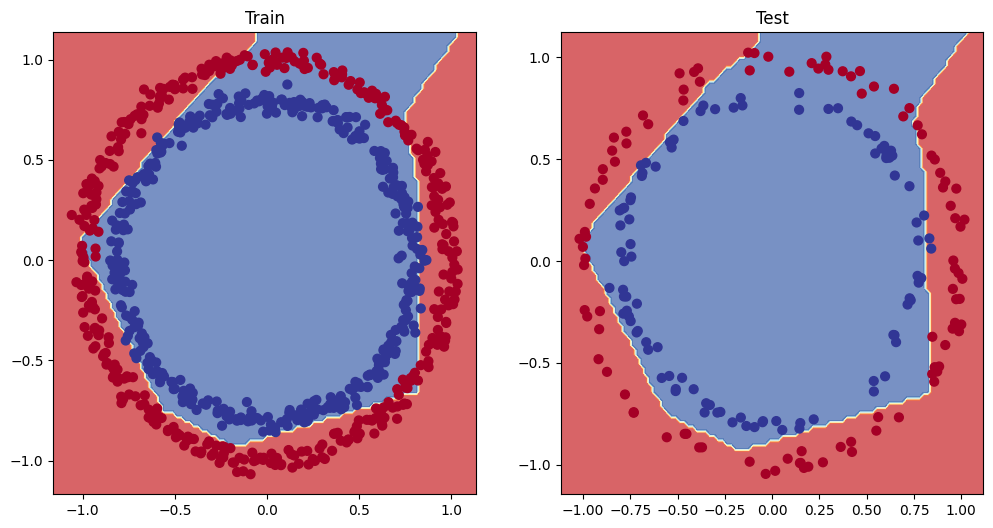

In [ ]:
# Plot the decision boundary for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show();

## **Plot the loss (or training) curves**

In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.699335,0.49375
1,0.697875,0.47125
2,0.696847,0.41875
3,0.695980,0.47000
4,0.695303,0.48000
...,...,...
195,0.297240,0.87250
196,0.295746,0.87625
197,0.294154,0.87250
198,0.292734,0.87625


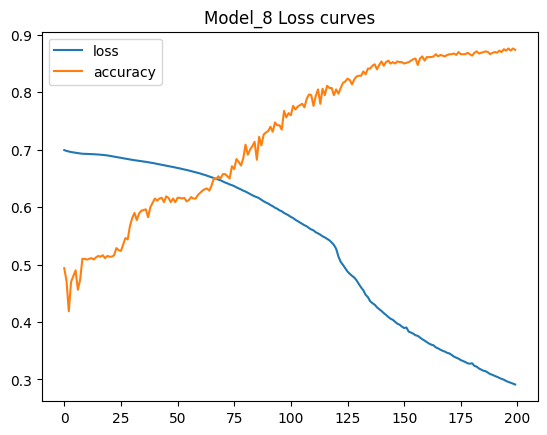

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 Loss curves");

**Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## **Finding the best learning rate**

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the folllowing steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here).
* A modifed loss curves plot.

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 12ms/step - loss: 0.6973 - accuracy: 0.5225 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 9ms/step - loss: 0.6972 - accuracy: 0.5225 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6971 - accuracy: 0.5225 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6969 - accuracy: 0.5213 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6968 - accuracy: 0.5213 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6967 - accuracy: 0.5213 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 10ms/step - loss: 0.6965 - accuracy: 0.5213 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6964 - accuracy: 0.5213 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 7ms/step - los

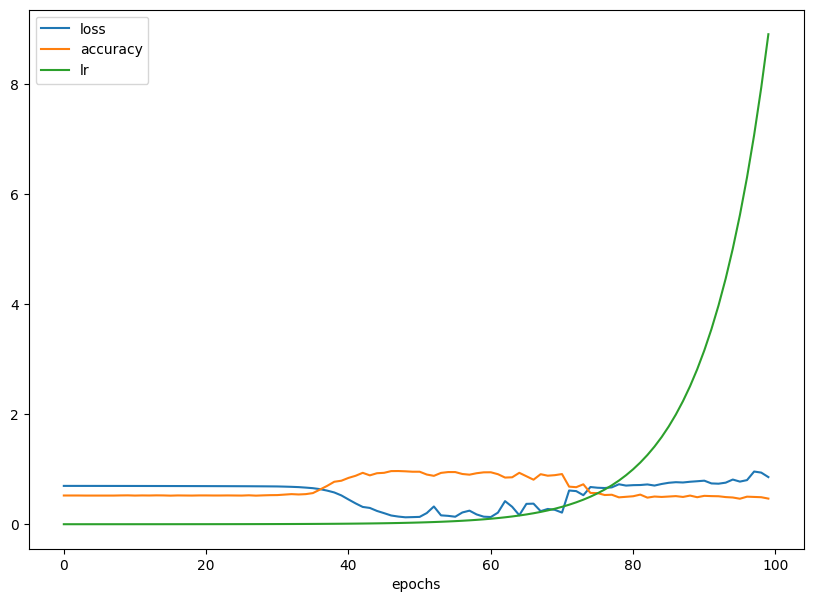

In [ ]:
# Check the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs");

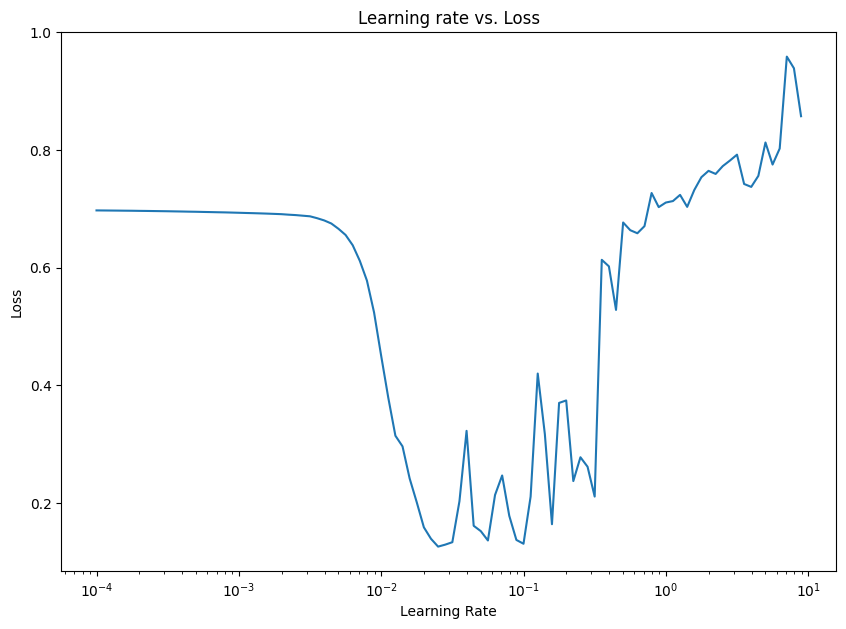

In [ ]:
# plot the learning rate versus the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

In [ ]:
len(lrs)

100

In [ ]:
# Examples of other typical learning values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Let's try using a higher "ideal" learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=["accuracy"])

# 3. Fit the model for 20 epochs
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 4ms/step - loss: 0.6989 - accuracy: 0.4938
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.4925
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.4888
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6880 - accuracy: 0.5225
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6848 - accuracy: 0.5450
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6784 - accuracy: 0.5412
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.5462
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.5788
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.6212
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.6975
Epoch 11/20
25/25 [

In [ ]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1832 - accuracy: 0.9800


[0.18323902785778046, 0.9800000190734863]

In [ ]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2745 - accuracy: 0.8850


[0.2744903266429901, 0.8849999904632568]

313/313 [==============================] - 1s 2ms/step
Doing binary classification
313/313 [==============================] - 1s 2ms/step
Doing binary classification


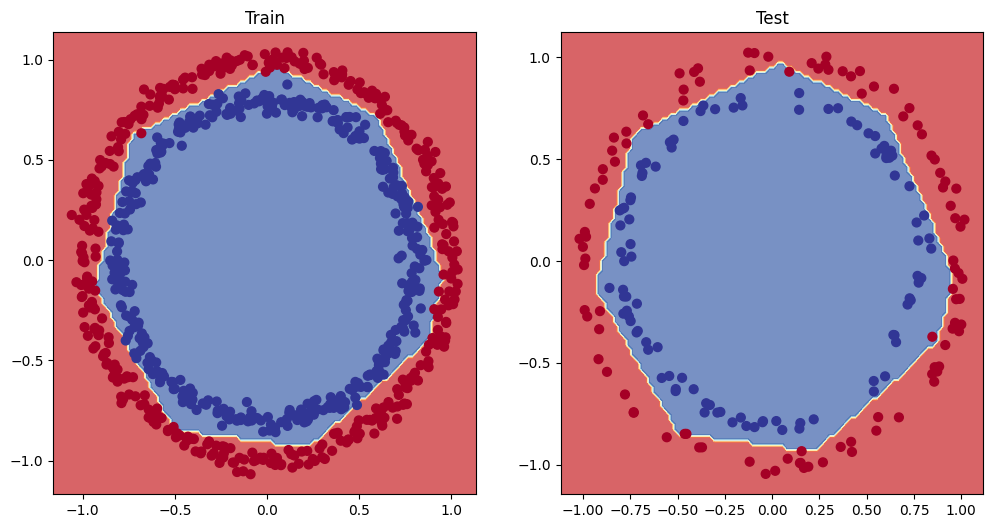

In [ ]:
# Plot the decision boundary for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)
plt.show();

## **More classification evaluation methods**

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.1832 - accuracy: 0.9800
Model loss on the test set: 0.18323902785778046
Model accuracy on the test set: 98.000002%


## **How about a confusion matrix?**

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[0.8548848 ],
       [0.8548848 ],
       [0.8548848 ],
       [0.8548848 ],
       [0.300382  ],
       [0.09429531],
       [0.8548848 ],
       [0.01913956],
       [0.81976134],
       [0.00879906]], dtype=float32)

Oops... looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[97,  4],
       [ 0, 99]])

How about we prettify our confusion matrix?

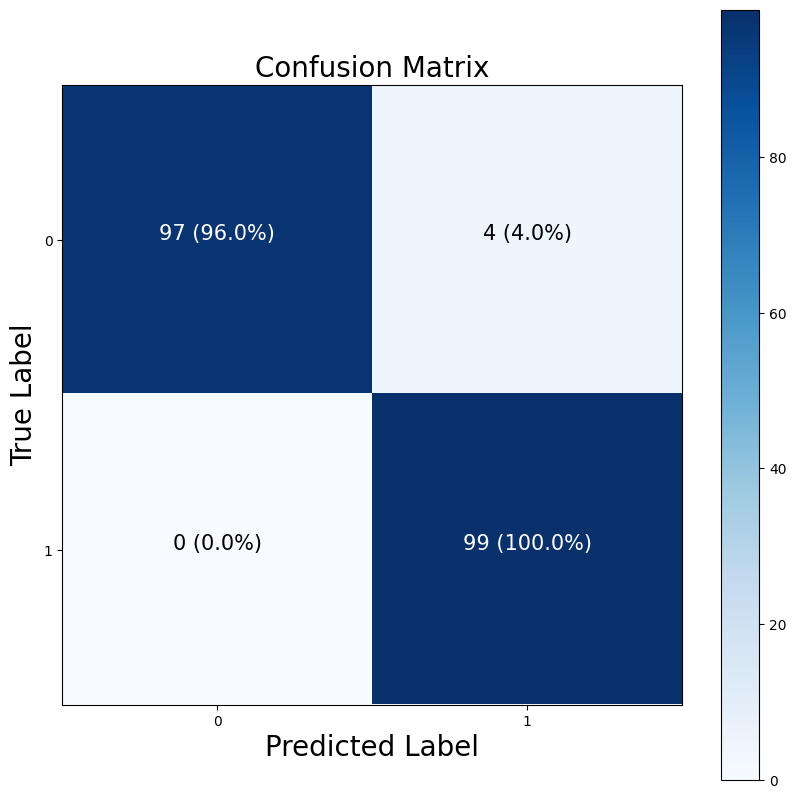

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different coors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# **Working with a larger example (multiclass classification)**

When you have more than two classes as an option, it's known as multi-class classification.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classificaiton, we're going to build a neural network to classify images of different items of clothing.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# Show the first training example
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [3]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

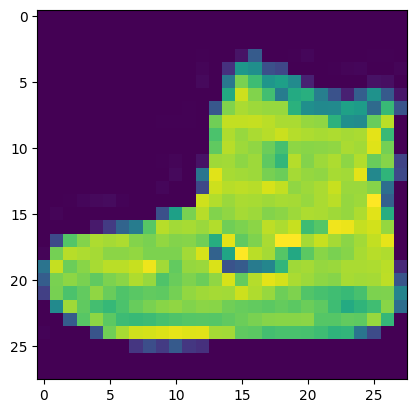

In [4]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [5]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

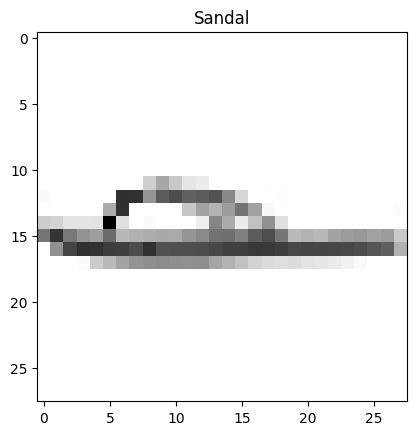

In [6]:
# Plot an example image and its label
example_id = 30
plt.imshow(train_data[example_id], cmap=plt.cm.binary)
plt.title(class_names[train_labels[example_id]]);

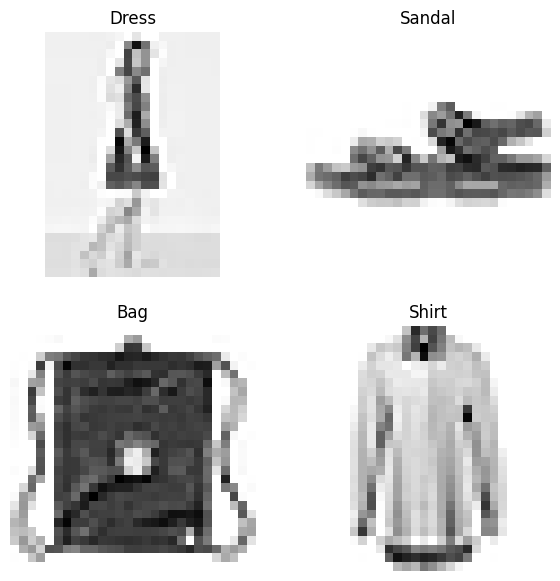

In [7]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## **Building a multiclass classification model**

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form, use SparseCategoricalCrossentropy()
* Output activation = Softmax

In [8]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.0157 - accuracy: 0.3557 - val_loss: 1.3805 - val_accuracy: 0.4375
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3328 - accuracy: 0.4341 - val_loss: 1.2644 - val_accuracy: 0.4483
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2324 - accuracy: 0.4799 - val_loss: 1.2692 - val_accuracy: 0.4554
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1855 - accuracy: 0.4980 - val_loss: 1.3189 - val_accuracy: 0.5086
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1460 - accuracy: 0.5098 - val_loss: 1.1056 - val_accuracy: 0.5371
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1229 - accuracy: 0.5337 - val_loss: 1.1047 - val_accuracy: 0.5229
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0842 - accuracy: 0.5508 - val_loss: 1.0922 - val_accuracy:

In [9]:
# Check the model summary
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8070 (31.52 KB)
Trainable params: 8070 (31.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 and 1.

In [11]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8081 - accuracy: 0.7235 - val_loss: 0.5541 - val_accuracy: 0.8132
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5054 - accuracy: 0.8286 - val_loss: 0.5317 - val_accuracy: 0.8209
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4670 - accuracy: 0.8394 - val_loss: 0.5027 - val_accuracy: 0.8254
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4457 - accuracy: 0.8462 - val_loss: 0.4883 - val_accuracy: 0.8314
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4327 - accuracy: 0.8493 - val_loss: 0.4986 - val_accuracy: 0.8271
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4219 - accuracy: 0.8522 - val_loss: 0.4853 - val_accuracy: 0.8290
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4143 - accuracy: 0.8546 - val_loss: 0.4893 - val_accuracy:

> **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 and 1).

<Axes: title={'center': 'Normalized data'}>

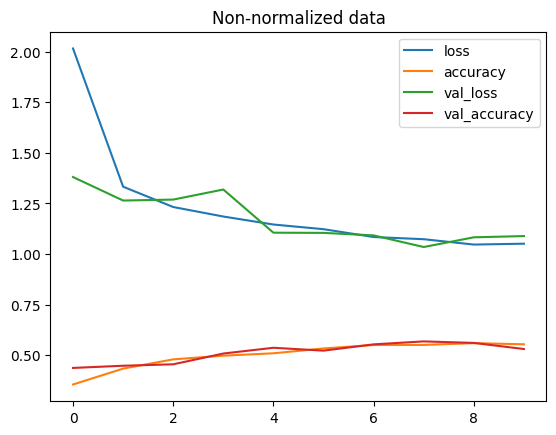

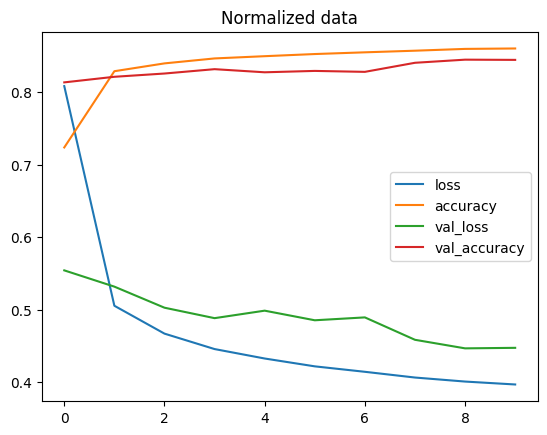

In [13]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

> **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## **Finding the ideal learning rate**

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm, train_labels, epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7113 - accuracy: 0.7453 - val_loss: 0.5239 - val_accuracy: 0.8147 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4857 - accuracy: 0.8273 - val_loss: 0.5299 - val_accuracy: 0.8127 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4515 - accuracy: 0.8390 - val_loss: 0.4992 - val_accuracy: 0.8121 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4346 - accuracy: 0.8461 - val_loss: 0.4725 - val_accuracy: 0.8303 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4237 - accuracy: 0.8504 - val_loss: 0.4702 - val_accuracy: 0.8354 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4173 - accuracy: 0.8522 - val_loss: 0.4839 - val_accuracy: 0.8250 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 2s

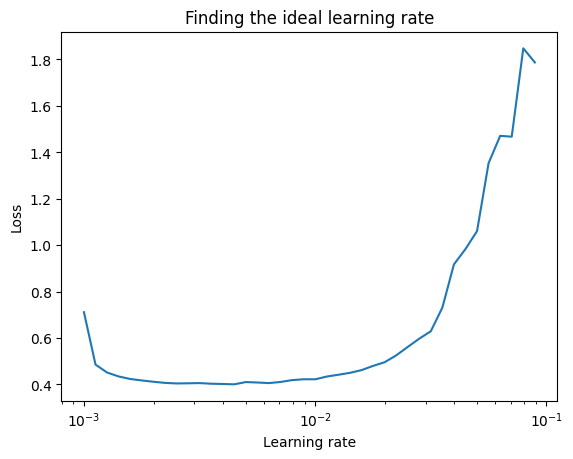

In [17]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [18]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create a model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7126 - accuracy: 0.7500 - val_loss: 0.5282 - val_accuracy: 0.8137
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4860 - accuracy: 0.8279 - val_loss: 0.5263 - val_accuracy: 0.8167
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4545 - accuracy: 0.8392 - val_loss: 0.4844 - val_accuracy: 0.8263
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4362 - accuracy: 0.8467 - val_loss: 0.4746 - val_accuracy: 0.8333
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4261 - accuracy: 0.8496 - val_loss: 0.4710 - val_accuracy: 0.8331
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4153 - accuracy: 0.8519 - val_loss: 0.4769 - val_accuracy: 0.8288
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4083 - accuracy: 0.8556 - val_loss: 0.4613 - val_accuracy:

## **Evaluating our multi-class classification model**

To evaluate our mutli-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its perdictions (through visualization)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...

In [19]:
# Create a confusion matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

figsize = (10,10)

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different coors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [20]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [22]:
# Make some predictions with our mode
y_probs = model_14.predict(test_data_norm) # probs is short for prediction probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[6.09234776e-05, 8.06432432e-09, 5.82002685e-05, 2.45774743e-07,
        6.76137830e-08, 5.63554391e-02, 2.34290201e-06, 1.00234516e-01,
        1.79527109e-04, 8.43108714e-01],
       [3.03969027e-05, 2.37412294e-07, 9.86486018e-01, 8.76660067e-07,
        1.11059286e-02, 1.14374639e-14, 2.36035651e-03, 6.16020479e-27,
        1.61861444e-05, 2.61183456e-16],
       [1.61836496e-07, 9.99981225e-01, 1.26199320e-05, 4.71132762e-06,
        7.36897675e-07, 6.20141785e-11, 7.10747372e-09, 2.91427504e-25,
        4.38217995e-07, 4.30741876e-15],
       [1.16666570e-07, 9.99963343e-01, 1.15374696e-05, 2.36690375e-05,
        1.03614752e-06, 1.46349057e-08, 4.40234160e-09, 2.20928537e-22,
        2.68194839e-07, 1.88520423e-12],
       [1.60549894e-01, 1.82664735e-06, 3.75694297e-02, 5.63489320e-03,
        1.05729643e-02, 1.38285972e-09, 7.82079041e-01, 3.32304219e-11,
        3.59188975e-03, 5.39564908e-08]], dtype=float32)

> **Note:** Remember to make predictions on the same kind of data your model was trained on.

In [26]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([6.09234776e-05, 8.06432432e-09, 5.82002685e-05, 2.45774743e-07,
        6.76137830e-08, 5.63554391e-02, 2.34290201e-06, 1.00234516e-01,
        1.79527109e-04, 8.43108714e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [27]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[770,   4,   8,  56,   8,   0, 142,   0,  12,   0],
       [  2, 958,   7,  26,   5,   0,   0,   0,   2,   0],
       [ 16,   7, 699,  12, 159,   0, 105,   0,   2,   0],
       [ 28,  22,  10, 819,  67,   1,  47,   0,   6,   0],
       [  0,   0,  74,  15, 836,   0,  71,   0,   4,   0],
       [  0,   0,   0,   1,   0, 933,   0,  36,   4,  26],
       [127,   2,  85,  33, 112,   3, 625,   0,  13,   0],
       [  0,   0,   0,   0,   0,  39,   0, 947,   2,  12],
       [  3,   0,   5,   6,   7,   5,  18,   6, 950,   0],
       [  1,   0,   0,   0,   0,  12,   1,  56,   1, 929]])

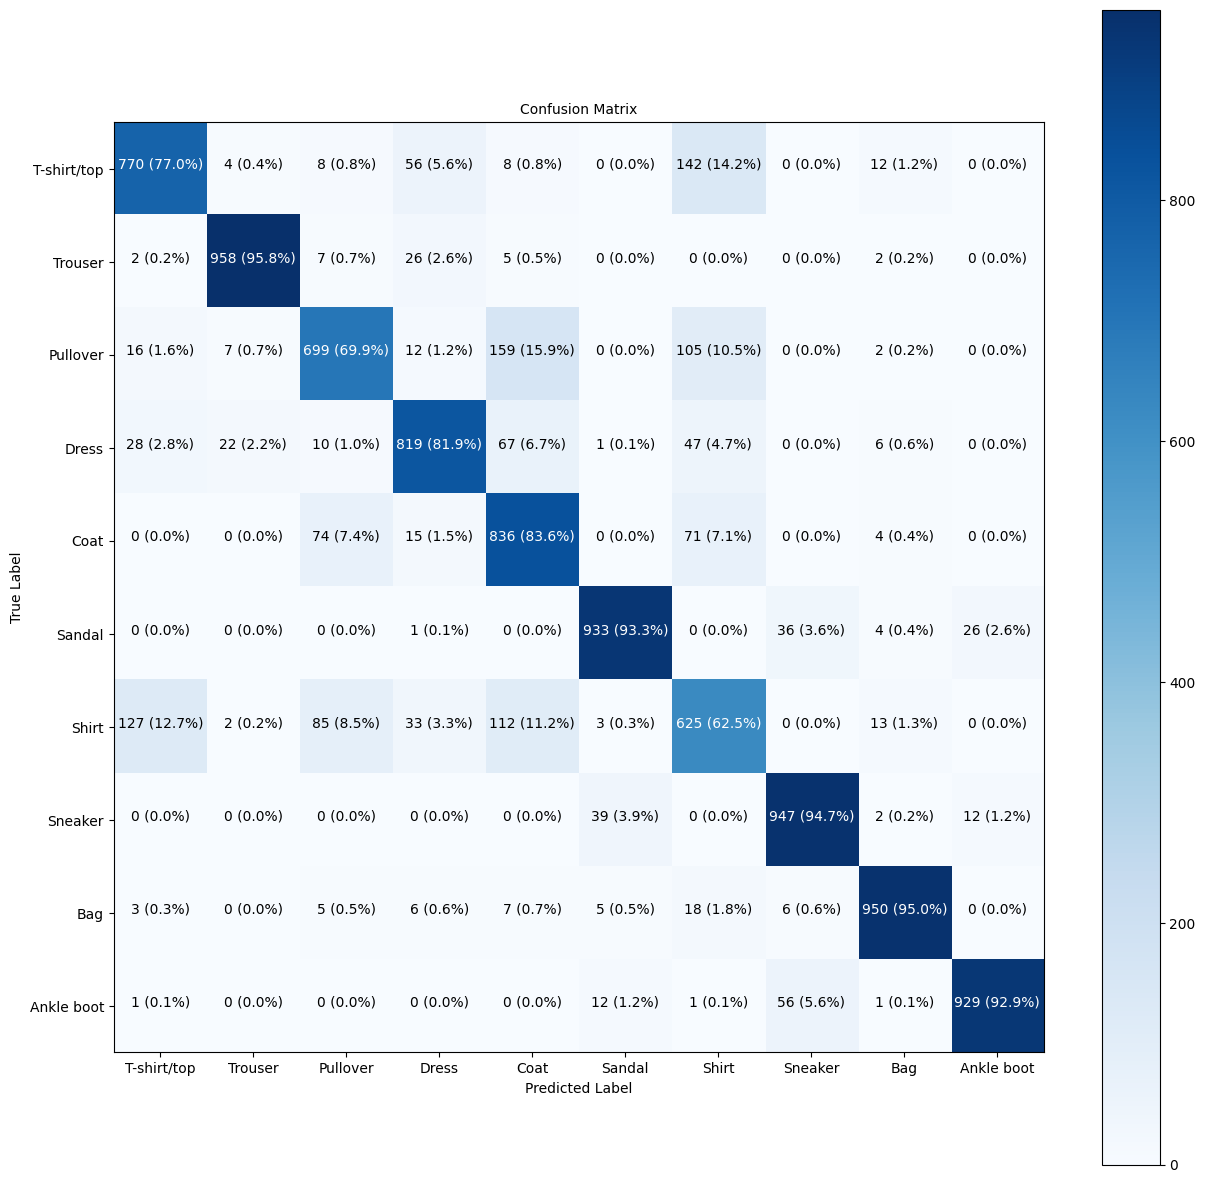

In [29]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

> **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the true label & the predicted label

In [33]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on if prediction is right or wrong

1/1 [==============================] - 0s 16ms/step


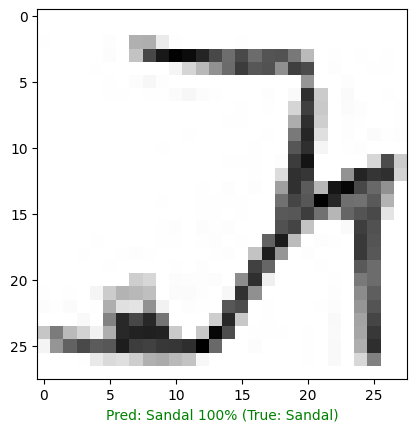

In [47]:
# Check our a random image as well as its prediction
plot_random_image(model=model_14, images=test_data_norm, true_labels=test_labels, classes=class_names)

 ## **What patterns is our model learning?**

In [48]:
# Find the layers of our most recent model
model_14.layers

In [49]:
# Extract a particular layer
model_14.layers[1]

In [50]:
# Get the patterns of a layer in our neural network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.7281927 ,  0.8542024 ,  0.02710911, ..., -0.07374839,
          0.2058556 , -0.24306059],
        [-0.4251879 , -0.23658295, -0.05790994, ..., -0.5672253 ,
         -0.14324431,  0.4896043 ],
        [-1.2048227 , -0.79452235,  0.07278418, ..., -0.61320096,
         -0.23043902,  0.6651182 ],
        ...,
        [-0.7240121 , -0.20137534,  0.02148474, ...,  0.14747833,
          0.0763768 ,  0.04399595],
        [-0.18635939, -0.42174745, -0.03217691, ..., -0.17453073,
          0.40580186, -0.86824805],
        [-0.32141024,  0.01058551,  0.0410303 , ..., -0.4322406 ,
          0.8110066 , -0.08227209]], dtype=float32),
 (784, 10))

In [51]:
model_14.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                7850      
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
Total params: 8070 (31.52 KB)
Trainable params: 8070 (31.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now let's check out the bias vector...

In [52]:
# Bias and biases shapes
biases, biases.shape

(array([ 0.06539387,  0.61686724, -0.01296827, -0.03007853,  0.34018904,
        -0.10773595,  0.2872378 ,  1.7215552 ,  0.231891  ,  0.7179157 ],
       dtype=float32),
 (10,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeros (at least in the case of a TensorFlow Dense layers).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [53]:
model_14.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                7850      
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
Total params: 8070 (31.52 KB)
Trainable params: 8070 (31.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


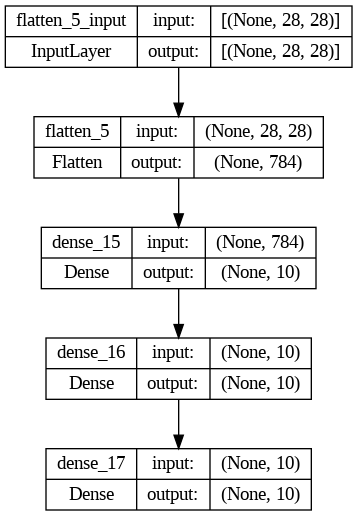

In [54]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)